# Tutorial6: Results on the testing set - (RG)

---

### Introduction

Hello, this notebook will train several ML models and evaluate them against the testing set. Feature sets are chosen based on the SFS method.

first, let us call the data

In [1]:
%store -r df_input_RG
%store -r y_RG
%store -r df_RG

In [2]:
y_RG = y_RG.map({'S': 1, 'B': 0})

---

calling some packages

In [3]:
# Python packages 
import pandas as pd # for importing data into data frame format
import seaborn as sns # For drawing useful graphs, such as bar graphs
import numpy as np
import matplotlib.pyplot as plt

---

<b><i> Data splitting </i></b> 

In [4]:
from sklearn.model_selection import train_test_split

Xtrain, Xtest, Ytrain, Ytest = train_test_split( df_input_RG, y_RG, test_size = 0.3, random_state=3, stratify=y_RG) # train and valid sets


In [5]:
print(Xtrain.shape)
print(Xtest.shape)

(393, 2074)
(169, 2074)


---

<b><i> import the best 50 features </i></b> 

In [6]:
#RFS
rfsImp = [1312.065, 874.121, 1312.729, 873.826, 1313.394, 882.151, 1314.06, 1503.852, 1311.401, 894.322, 1310.738, 894.014, 1308.754, 1309.415, 898.662, 1509.104, 1308.093, 900.535, 1310.076, 1502.98, 2480.996, 1508.226, 1307.433, 900.848, 1306.774, 900.222, 1306.116, 1509.983, 1301.526, 904.936, 1300.873, 899.91, 1507.349, 1302.18, 904.62, 1314.726, 2483.372, 1506.473, 1300.221, 904.305, 1305.458, 1512.626, 912.58, 1302.834, 1299.569, 898.351, 1502.109, 1304.801, 1920.475, 903.989]

# SFS
sfsImp = [1840.057, 1486.606, 904.62, 1168.909, 888.5, 980.575, 1152.285, 1522.396, 1857.192, 1861.192, 976.513, 882.451, 1136.126, 1523.291, 1399.159, 1123.815, 1022.335, 1028.01, 1126.745, 1127.235, 948.99, 953.878, 1862.529, 1023.95, 1125.278, 1122.841, 946.565, 954.58, 951.777, 1127.725, 1125.767, 1537.747, 1026.788, 1541.403, 1120.9, 1019.521, 953.527, 952.827, 1538.659, 1025.57, 949.686, 952.126, 1126.256, 1539.573, 951.428, 950.033, 951.078, 952.476, 1025.164, 1023.142]

In [7]:
# RFS
rfs = [rfsImp, [8, 10, 37, 50]]
# SFS
sfs = [sfsImp, [3, 10, 37, 50]]

In [8]:
features = [ rfs, sfs]
features_name = [ "rfs", "sfs",] 

---

<b><i> models </i></b> 

In [9]:
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from numpy import random as np_random

first let us define the model

In [10]:
lr = LogisticRegression()
svm = SVC(kernel="rbf")
rf = RandomForestClassifier(random_state=1)
xgb = XGBClassifier(random_state=1)
knns = KNeighborsClassifier()
anns = MLPClassifier(max_iter=3000, random_state=1, activation = 'relu', solver = 'sgd')

defining the hyper-paramter per model

In [11]:
solvers = ['newton-cg', 'liblinear']
penalty = ['l2']
c_values = [1000, 100, 10, 1.0, 0.1, 0.01, 0.001]
lr_par = dict(solver=solvers,penalty=penalty,C=c_values)

##############################
C_range = np.logspace(-1, 10, 20) # define a set of values for the parameter C
gamma_range = np.logspace(-9, 3, 20) # define a set of values for the parameter gamma

svm_par = dict(gamma=gamma_range, C=C_range)

#########################

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid

#max_features = ['sqrt', 'log2']

rf_par = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
#######################
# https://www.kaggle.com/code/tilii7/hyperparameter-grid-search-with-xgboost/notebook
xgb_par = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5, 9],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5, 8]
        }
##################################
n_neighbors = range(1, 30, 2)
weights = ['uniform', 'distance']
metric = ['euclidean', 'manhattan', 'minkowski']

knns_par = dict(n_neighbors=n_neighbors,weights=weights,metric=metric)
################
anns_par = {
    'hidden_layer_sizes': [(3,3),(5,5),(8,3)],
#     'activation': ['relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.001,0.01,0.1, 0.05, 0.005 , 0.005, 0.00005],
#     'learning_rate': ['constant','adaptive'],
}
################

In [12]:
models = [[lr, 'lr', 14], [svm, 'svm', 15], [rf, 'rf', 30], [xgb, 'xgb', 30], [knns, 'knns', 30], [anns, 'anns', 30]]
par = [lr_par, svm_par, rf_par, xgb_par, knns_par, anns_par]

# models = [[lr, 'lr', 14]]
# par = [lr_par]

---

<b><i> training, TESTING RESULTS </i></b> 

In [13]:
from source.ml_acc import get_accuracy_ml

In [14]:
# num_ml_tools = len(par)
# ml_dicts = {}

# for m, par in zip(models, par):
#     key_model = str(m[1])
#     ml_dicts[key_model] = {}
#     print(key_model)
#     for ind_imp in range (4):
#         print(ind_imp)
#         for f, f_name in zip(features, features_name):
#             print(f[0])
#             featArry = f[0]
#             featArry2 = featArry[:f[1][ind_imp]]
#             xtr =  Xtrain[featArry2]
#             print(list(xtr.columns))
            

#             xte =  Xtest[featArry2]
#             results = get_accuracy_ml (m[0], m[2], par, np.array(xtr), np.array(Ytrain), np.array(xte), np.array(Ytest)) # to get the accuracies for the ml model

#             key_feat = str(f_name)+","+str(f[1][ind_imp])
#             print(key_feat)
#             print()
#             ml_dicts[key_model][key_feat] = {}

#             ml_dicts[key_model][key_feat]['tot_acc'] = results[0]
#             ml_dicts[key_model][key_feat]['jack_train'] = results[1]
#             ml_dicts[key_model][key_feat]['jack_test'] = results[2]

---

In [15]:
import json
# with open('ml_rg_test.txt', 'w') as file:
#      file.write(json.dumps(ml_dicts)) # use `json.loads` to do the reverse

In [16]:
import json
with open('ml_rg_test.txt') as f:
    data = f.read()
    
ml_dicts = json.loads(data)

with open('base_rg_test.txt') as f:
    data = f.read()
    
baseDict = json.loads(data)
baseDict['lr'].keys()   

dict_keys(['lr, all'])

In [17]:
print(baseDict['lr'].keys()    )
print(ml_dicts['lr'].keys()    )

dict_keys(['lr, all'])
dict_keys(['rfs,8', 'rfs_200,3', 'sfs,3', 'sfs_200,5', 'rfs,10', 'rfs_200,10', 'sfs,10', 'sfs_200,10', 'rfs,37', 'rfs_200,20', 'sfs,37', 'sfs_200,20', 'rfs,50', 'rfs_200,50', 'sfs,50', 'sfs_200,50'])


---

### Precision performance

In [18]:
from source.calculate_jack import jack_SD # importing the baseline code from source.basline file

In [19]:
arr_diff_all = []

for m, m_key in zip (models, ml_dicts.keys()):
    acc_diff_arr = [] 
    sd_diff_arr = [] 
    keys = []
    for f_key in ml_dicts[m_key].keys():
        if 'rfs' not in f_key and '200' not in f_key:
            # print(f_key)
            keys.append(f_key)
            value = f_key.split(',')
            # acc_diff_arr.append( ml_dicts[m_key][f_key][ 'tot_acc' ] - baseDict['lr']['lr, all'][ 'tot_acc' ]  )
            acc_diff_arr.append( ml_dicts[m_key][f_key][ 'tot_acc' ])

            sd_train = jack_SD( baseDict['lr']['lr, all'][ 'jack_train' ], ml_dicts[m_key][f_key]['jack_train'] )[0]
            sd_test = jack_SD(  baseDict['lr']['lr, all'][ 'jack_test' ],  ml_dicts[m_key][f_key]['jack_test']   )[0]

            sd = np.sqrt( np.array((sd_train**2)) + np.array((sd_test**2)))
            sd_diff_arr.append(sd) # append sd_arr to an array
    
    arr_diff_all.append([keys, acc_diff_arr, sd_diff_arr]) 

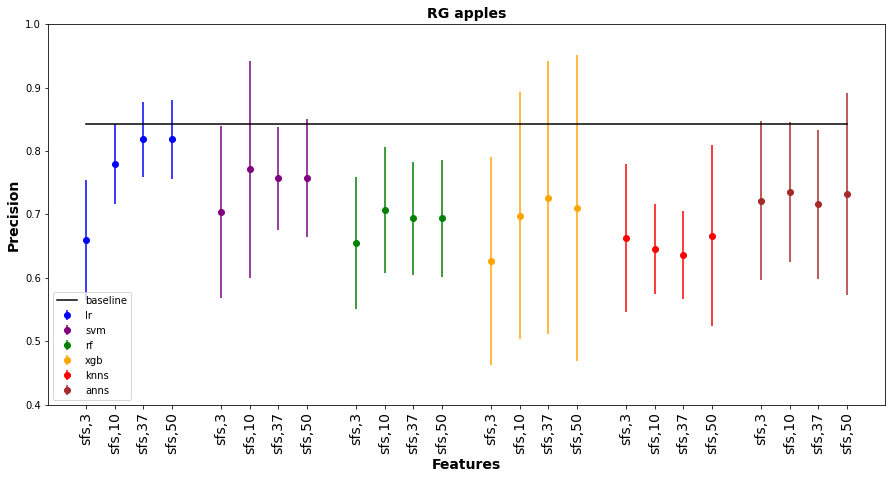

In [20]:
colors = ['blue', 'purple', 'green', 'orange', 'red', 'brown']
plt.figure(figsize=(15, 7))
plt.title("RG apples", fontweight ='bold', fontsize =14)    
plt.xlabel("Features", fontweight ='bold', fontsize =14)
plt.ylabel("Precision", fontweight ='bold', fontsize =14)

count = 0
n = len(colors)-0.5
space = []
tickFeat = []

for result, model, color in zip(arr_diff_all, models, colors):
    a = np.linspace(n*count, n*(1+count)-2,len(arr_diff_all[0][0]))
    space.extend(a)
    tickFeat.extend(result[0])
    print()
    plt.errorbar( a, result[1], result[2], fmt='o', label =model[1], color = color)
    count += 1
    
    
    
plt.plot(np.array(space), np.zeros(len(arr_diff_all[0][0])*6)+0.842, color = 'Black', label = 'baseline')        
plt.xticks(space, tickFeat, rotation = 'vertical',  fontsize =14)
plt.ylim(.4, 1)
plt.legend()

plt.show()

---